# Exploratory Data Analysis - G2M insight for Cab Investment firm 

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster', font_scale = 2) # style
sns.set_theme() # style
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})# style
sns.set(rc = {'figure.figsize':(15,8)}) # fig size

## Cab Data

In [2]:
cab = pd.read_csv("Cab_Data.csv")
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cab.shape[0]

106833

In [4]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106833 entries, 0 to 106832
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  106833 non-null  int64  
 1   Date of Travel  106833 non-null  int64  
 2   Company         106833 non-null  object 
 3   City            106833 non-null  object 
 4   KM Travelled    106833 non-null  float64
 5   Price Charged   106833 non-null  float64
 6   Cost of Trip    106832 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      1
dtype: int64

In [6]:
# Function for annotation 
def annotation(): 
    x_axis=plt.gca()
    for px in x_axis.patches:
        x_axis.text(px.get_x() + px.get_width()/2, px.get_height(), '%d' % int(px.get_height()),fontsize=13,color='black',rotation = 45,ha='center',va='bottom')
  

### How often people using both cabs ? count of users

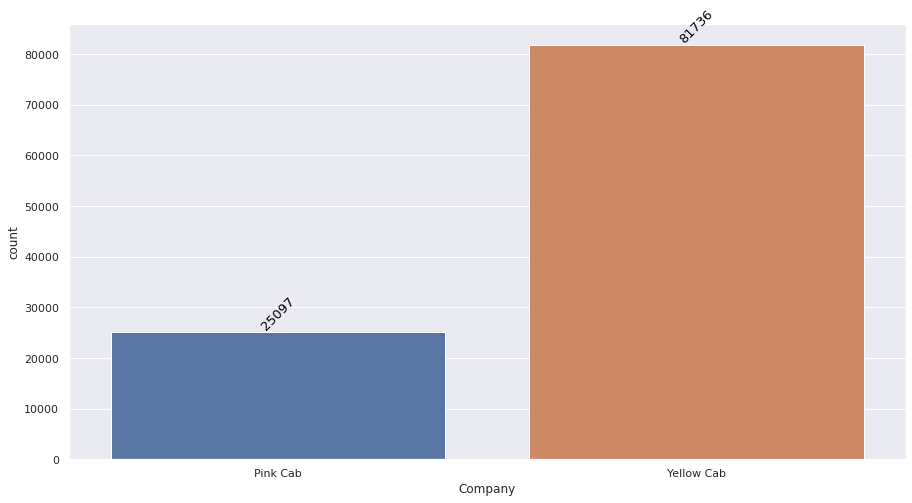

In [7]:
# analysisng company 
ax = sns.countplot(x = cab["Company"]) 
annotation()
plt.show()

In [8]:
counts=cab.Company.value_counts() 
counts

Yellow Cab    81736
Pink Cab      25097
Name: Company, dtype: int64

### What is the percentage of both cabs in order to users?

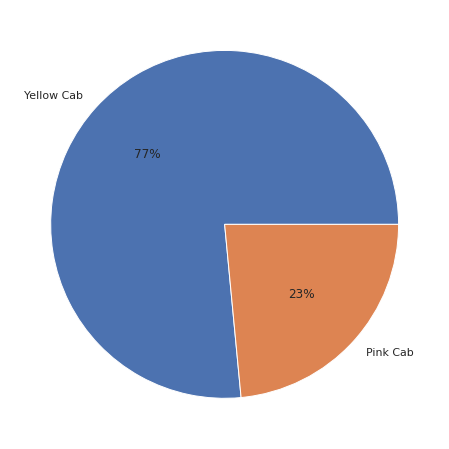

In [21]:

label = ["Yellow Cab","Pink Cab"]
  

plt.pie(counts, labels=label, autopct='%.0f%%')
  

plt.show()

### what is the count of Cab users in order to city ?

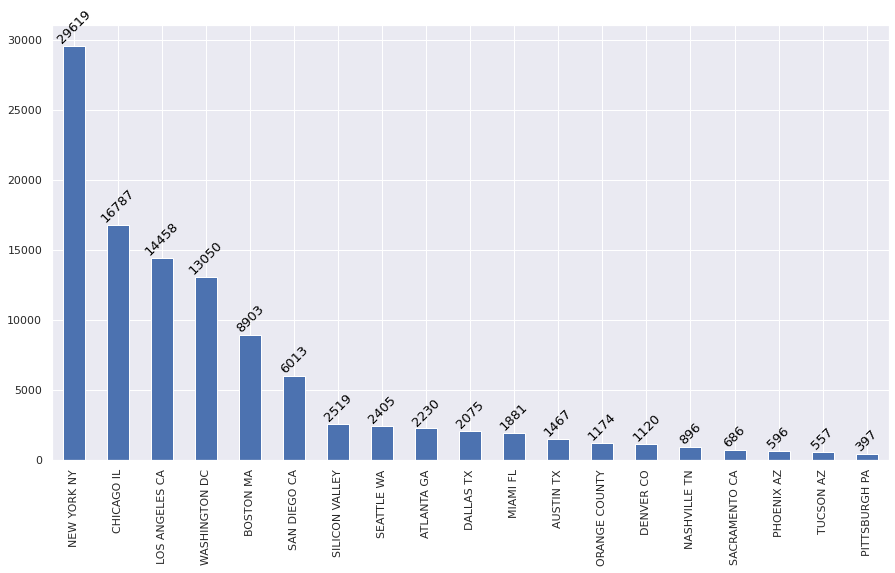

In [12]:
cab.City.value_counts().plot(kind='bar')
annotation()

In [13]:
cab.groupby(["City","Company"])["Company"].count()

City            Company   
ATLANTA GA      Pink Cab        522
                Yellow Cab     1708
AUSTIN TX       Pink Cab        539
                Yellow Cab      928
BOSTON MA       Pink Cab       1531
                Yellow Cab     7372
CHICAGO IL      Pink Cab       2790
                Yellow Cab    13997
DALLAS TX       Pink Cab        412
                Yellow Cab     1663
DENVER CO       Pink Cab        411
                Yellow Cab      709
LOS ANGELES CA  Pink Cab       5899
                Yellow Cab     8559
MIAMI FL        Pink Cab        598
                Yellow Cab     1283
NASHVILLE TN    Pink Cab        550
                Yellow Cab      346
NEW YORK NY     Pink Cab       4067
                Yellow Cab    25552
ORANGE COUNTY   Pink Cab        442
                Yellow Cab      732
PHOENIX AZ      Pink Cab        257
                Yellow Cab      339
PITTSBURGH PA   Pink Cab        210
                Yellow Cab      187
SACRAMENTO CA   Pink Cab        388
 

### KM Travelling of both cabs

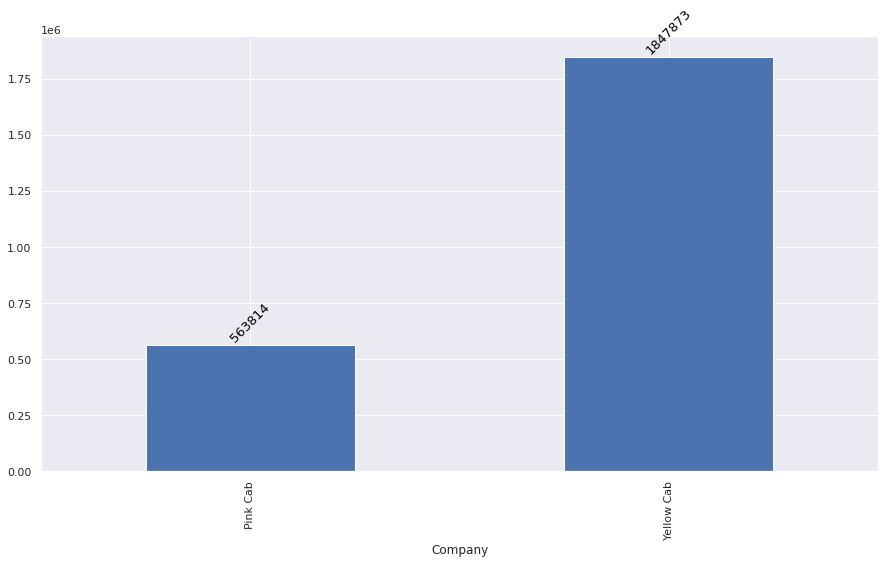

In [14]:
cab.groupby(["Company"])["KM Travelled"].sum().plot(kind='bar')
annotation()


### What is the profit of of both cabs?

In [15]:
cab["profit"] = cab["Price Charged"] - cab["Cost of Trip"]

In [16]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


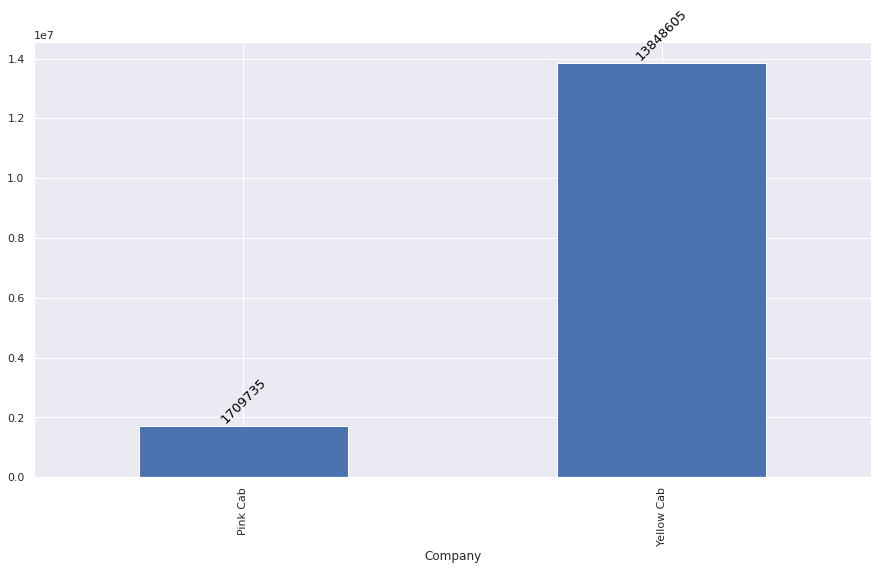

In [17]:
cab.groupby(["Company"])["profit"].sum().plot(kind='bar')
annotation()


In [18]:
cab.groupby(["Company","City"])["profit"].sum()

Company     City          
Pink Cab    ATLANTA GA        3.439931e+04
            AUSTIN TX         4.241188e+04
            BOSTON MA         9.343170e+04
            CHICAGO IL        1.129368e+05
            DALLAS TX         8.617723e+03
            DENVER CO         1.477632e+04
            LOS ANGELES CA    3.783192e+05
            MIAMI FL          5.075302e+04
            NASHVILLE TN      2.019369e+04
            NEW YORK NY       4.581151e+05
            ORANGE COUNTY     2.866274e+04
            PHOENIX AZ        1.244270e+04
            PITTSBURGH PA     5.739736e+03
            SACRAMENTO CA     1.710167e+04
            SAN DIEGO CA      2.052203e+05
            SEATTLE WA        4.155675e+04
            SILICON VALLEY    1.069276e+05
            TUCSON AZ         2.002548e+04
            WASHINGTON DC     5.810345e+04
Yellow Cab  ATLANTA GA        2.306749e+05
            AUSTIN TX         1.251115e+05
            BOSTON MA         4.945192e+05
            CHICAGO IL     

## City Data

In [19]:
city = pd.read_csv("City.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [22]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [23]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [25]:
# convert data types of population and users
def convert(value):
       value = value.replace(',', '')
       return int(value)
city['Population'].apply(convert)

0     8405837
1     1955130
2     1595037
3     1339155
4     1177609
5     1030185
6      959307
7      943999
8      942908
9      814885
10     754233
11     698371
12     671238
13     631442
14     629591
15     545776
16     542085
17     418859
18     327225
19     248968
Name: Population, dtype: int64

In [26]:
city['Users'].apply(convert)

0     302149
1     164468
2     144132
3      17675
4      27247
5      12994
6      69995
7       6133
8      22157
9      24701
10     12421
11     14978
12     25063
13      5712
14    213609
15      7044
16      3643
17    127001
18      9270
19     80021
Name: Users, dtype: int64

In [29]:
city['Population'] = city['Population'].str.replace('[,]', '', regex=True)
city['Population'] = pd.to_numeric(city['Population'])
city['Population']

0     8405837
1     1955130
2     1595037
3     1339155
4     1177609
5     1030185
6      959307
7      943999
8      942908
9      814885
10     754233
11     698371
12     671238
13     631442
14     629591
15     545776
16     542085
17     418859
18     327225
19     248968
Name: Population, dtype: int64

In [30]:
city['Users'] = city['Users'].str.replace('[,]', '', regex=True)
city['Users'] = pd.to_numeric(city['Users'])
city['Users']

0     302149
1     164468
2     144132
3      17675
4      27247
5      12994
6      69995
7       6133
8      22157
9      24701
10     12421
11     14978
12     25063
13      5712
14    213609
15      7044
16      3643
17    127001
18      9270
19     80021
Name: Users, dtype: int64

### Cab users By City

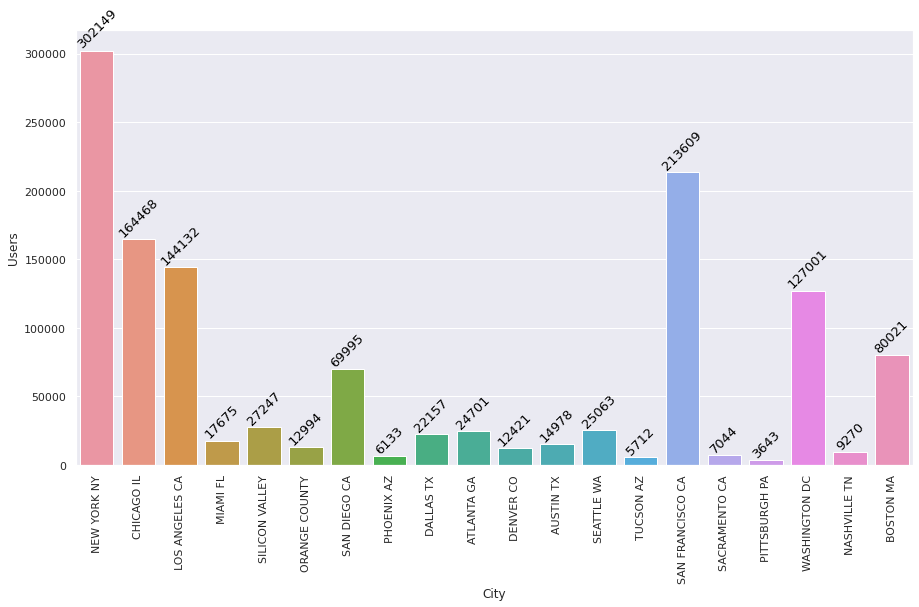

In [32]:
sns.barplot(x=city['City'],y=city['Users'])
plt.xticks(rotation='vertical')
annotation()
plt.show()


### Cab users by population

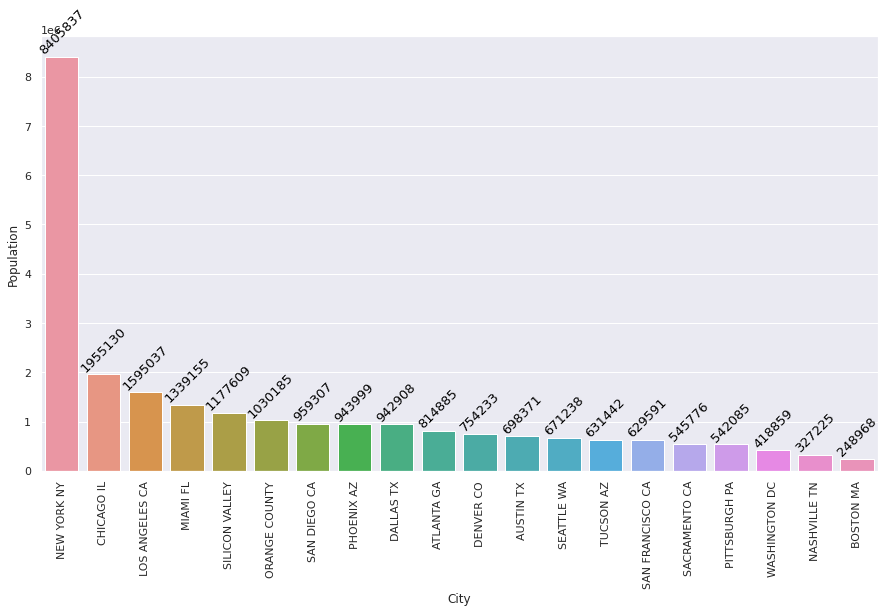

In [31]:
sns.barplot(x=city['City'],y=city['Population'])
plt.xticks(rotation='vertical')
annotation()
plt.show()

### What is the percentage of cab users in each cities?

In [33]:
city["cap_usage %"]= (city['Users'] /city['Population']) * 100 


In [34]:
city

,City,Population,Users,cap_usage %
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756
5,ORANGE COUNTY,1030185,12994,1.261327
6,SAN DIEGO CA,959307,69995,7.296413
7,PHOENIX AZ,943999,6133,0.649683
8,DALLAS TX,942908,22157,2.349858
9,ATLANTA GA,814885,24701,3.031225


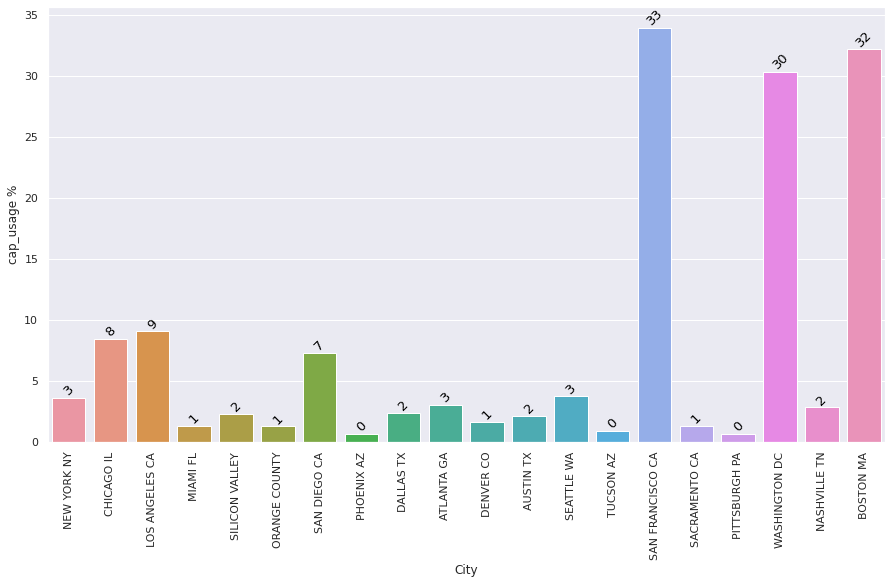

In [35]:
sns.barplot(x=city['City'],y=city["cap_usage %"])
plt.xticks(rotation='vertical')
annotation()
plt.show()

**CUSTOMER_ID**

In [36]:
customer = pd.read_csv("Customer_ID.csv")
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [37]:
customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [38]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [39]:
customer.shape

(49171, 4)

### Number of cab users by Gender

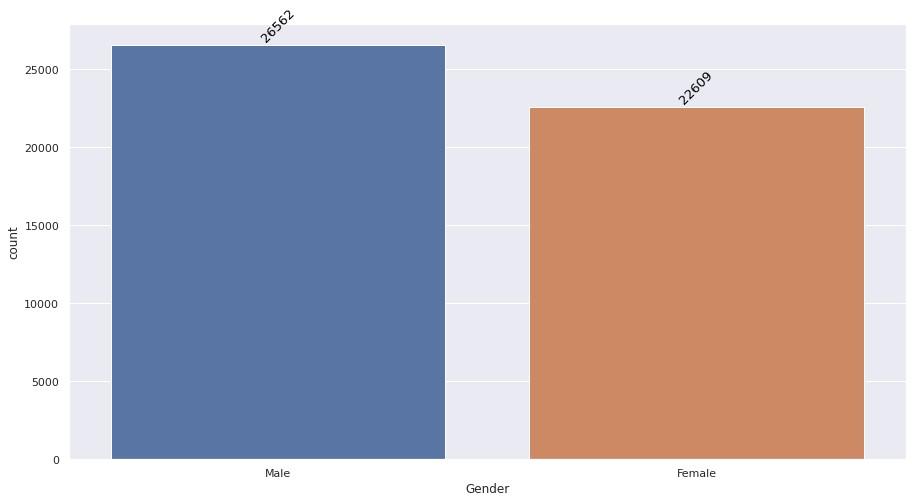

In [40]:
ax = sns.countplot(x = customer["Gender"]) 
annotation()
plt.show()

### Number of cab users by Age

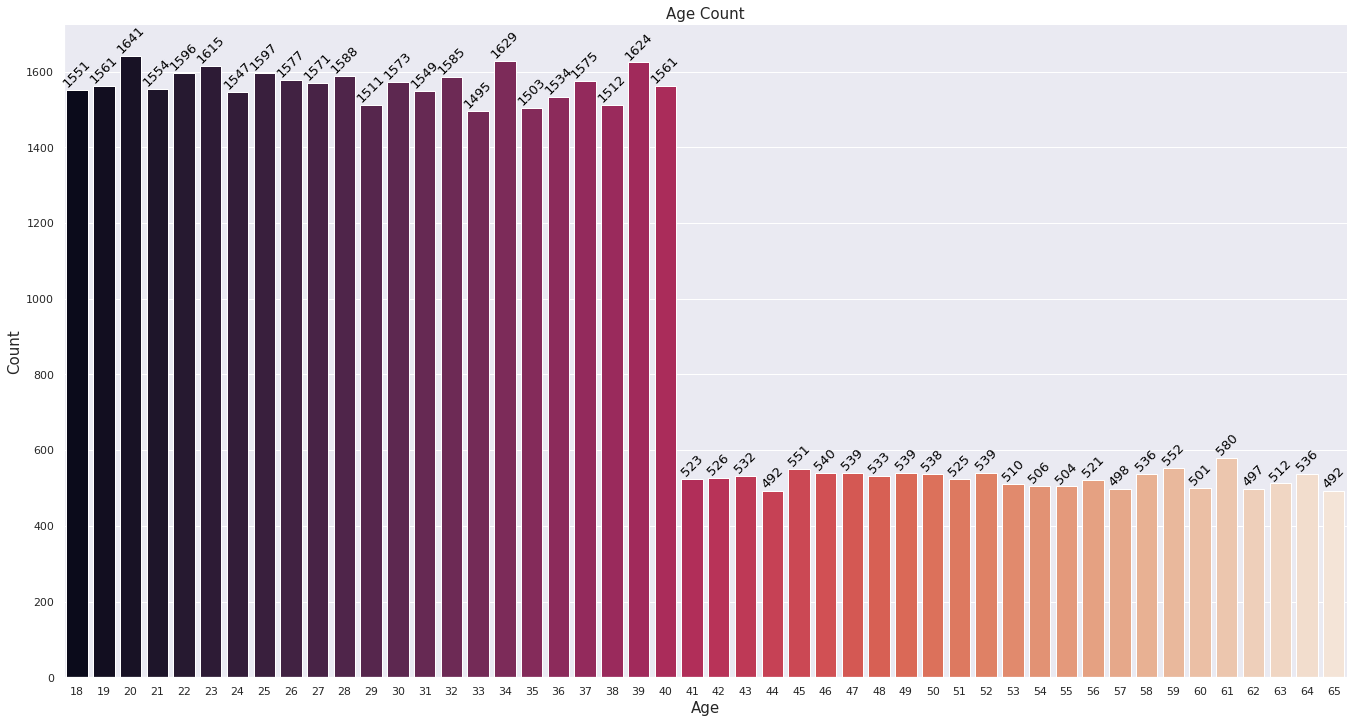

In [41]:
fig, axis = plt.subplots()  
fig.set_size_inches(23, 12) 
sns.countplot(x = 'Age', data = customer,palette="rocket") 
axis.set_xlabel('Age', fontsize=15) 
axis.set_ylabel('Count', fontsize=15)
axis.set_title('Age Count', fontsize=15) 
sns.despine()
annotation()

# Transaction_ID

In [42]:
transaction = pd.read_csv("Transaction_ID.csv")
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [43]:
transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [44]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [45]:
transaction.shape[0]

440098

### Cab users by Payment Mode

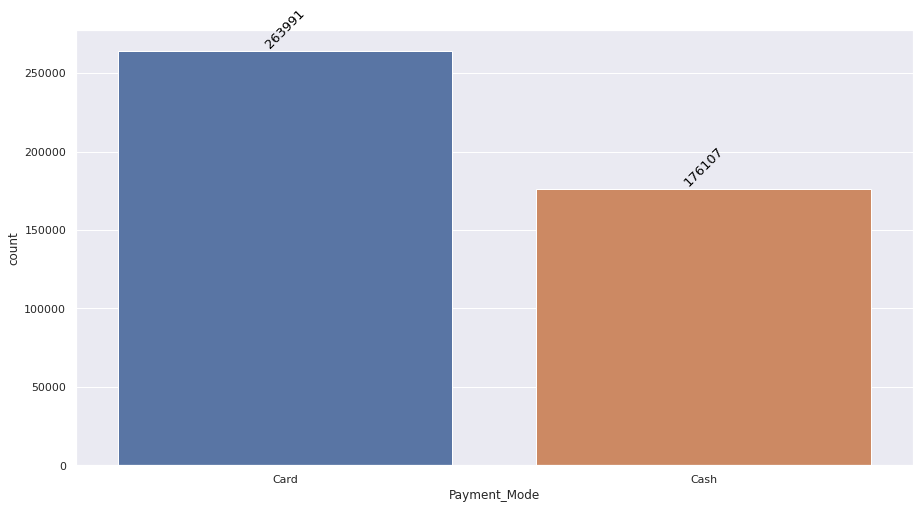

In [46]:
ax = sns.countplot(x = transaction["Payment_Mode"]) 
annotation()
plt.show()

In [47]:
# merging all four datasets together
data= cab.merge(transaction, on= 'Transaction ID').merge(customer, on ='Customer ID').merge(city, on = 'City')
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,cap_usage %
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,29290,Card,Male,28,10813,814885,24701,3.031225
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,27703,Card,Male,27,9237,814885,24701,3.031225
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,28712,Cash,Male,53,11242,814885,24701,3.031225
3,10079404,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.208,210.092,28712,Card,Male,53,11242,814885,24701,3.031225
4,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,28020,Cash,Male,23,23327,814885,24701,3.031225


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106833 entries, 0 to 106832
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      106833 non-null  int64  
 1   Date of Travel      106833 non-null  int64  
 2   Company             106833 non-null  object 
 3   City                106833 non-null  object 
 4   KM Travelled        106833 non-null  float64
 5   Price Charged       106833 non-null  float64
 6   Cost of Trip        106832 non-null  float64
 7   profit              106832 non-null  float64
 8   Customer ID         106833 non-null  int64  
 9   Payment_Mode        106833 non-null  object 
 10  Gender              106833 non-null  object 
 11  Age                 106833 non-null  int64  
 12  Income (USD/Month)  106833 non-null  int64  
 13  Population          106833 non-null  int64  
 14  Users               106833 non-null  int64  
 15  cap_usage %         106833 non-nul

In [49]:
data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Age,Income (USD/Month),Population,Users,cap_usage %
count,1.068330e+05,106833.000000,106833.000000,106833.000000,106832.000000,106832.000000,106833.000000,106833.000000,106833.000000,1.068330e+05,106833.000000,106833.000000
mean,1.006646e+07,42586.143364,22.574371,431.985380,286.355646,145.633712,19238.665974,35.362285,15057.108422,3.126885e+06,158383.493565,10.708460
std,3.772638e+04,101.823047,12.221627,281.419698,157.921375,167.648520,21044.199547,12.591012,7989.084849,3.313083e+06,100670.359034,10.650559
min,1.000001e+07,42371.000000,1.900000,7.000000,19.000000,-198.698000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000,0.649683
25%,1.003389e+07,42505.000000,12.000000,209.630000,151.200000,30.687500,2712.000000,25.000000,8397.000000,6.712380e+05,80021.000000,3.594514
50%,1.006715e+07,42603.000000,22.470000,392.740000,282.635200,88.999600,7467.000000,33.000000,14698.000000,1.595037e+06,144132.000000,7.296413
75%,1.009912e+07,42673.000000,32.960000,595.230000,414.135000,201.075500,36214.000000,42.000000,21017.000000,8.405837e+06,302149.000000,9.036279
max,1.013075e+07,42738.000000,48.000000,1978.790000,691.200000,1336.870000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000,32.141078


In [50]:
print(data.corr())

                    Transaction ID  Date of Travel  KM Travelled  \
Transaction ID            1.000000        0.990638     -0.001946   
Date of Travel            0.990638        1.000000     -0.002483   
KM Travelled             -0.001946       -0.002483      1.000000   
Price Charged            -0.054586       -0.067731      0.831542   
Cost of Trip             -0.007114       -0.010124      0.981872   
profit                   -0.084890       -0.104125      0.470990   
Customer ID              -0.050048       -0.052654     -0.002118   
Age                       0.000111        0.000152      0.001631   
Income (USD/Month)        0.002156        0.002189      0.002042   
Population                0.071589        0.066915     -0.000633   
Users                     0.042124        0.036225     -0.000246   
cap_usage %              -0.065406       -0.070146     -0.001662   

                    Price Charged  Cost of Trip    profit  Customer ID  \
Transaction ID          -0.054586     -0.

### Co-Relation of numeric Features

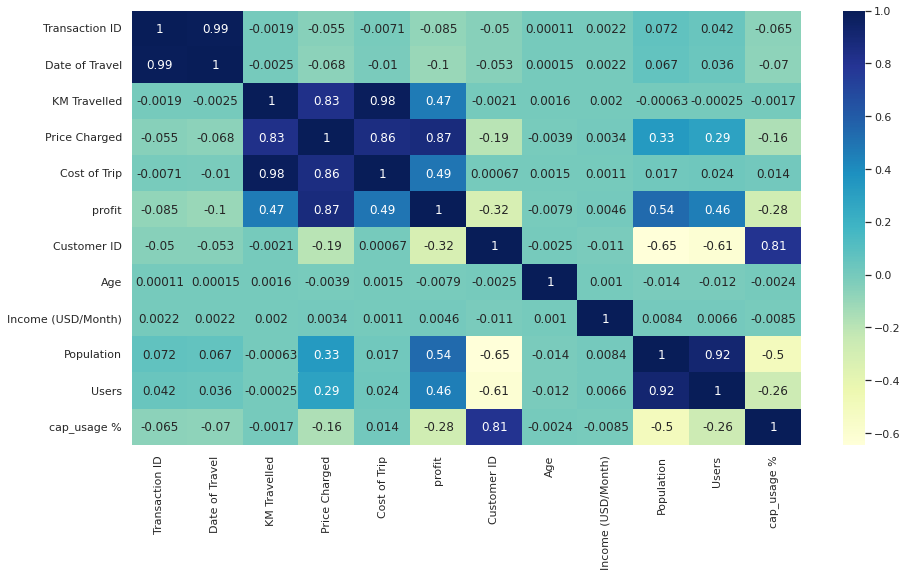

In [52]:

dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

plt.show()

In [53]:
# changing date time format
a = data['Date of Travel'].to_list()

from_date = pd.Timestamp('1899-12-29')

dates = [from_date + pd.DateOffset(date_offset) for date_offset in a]

data['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [54]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,cap_usage %
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,29290,Card,Male,28,10813,814885,24701,3.031225
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,27703,Card,Male,27,9237,814885,24701,3.031225
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,28712,Cash,Male,53,11242,814885,24701,3.031225
3,10079404,2016-09-20,Yellow Cab,ATLANTA GA,39.60,704.30,494.208,210.092,28712,Card,Male,53,11242,814885,24701,3.031225
4,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,28020,Cash,Male,23,23327,814885,24701,3.031225


In [55]:
 # seperate year and months from date columns
data['month']= data['Date of Travel'].dt.month

data['Year'] = data['Date of Travel'].dt.year

In [56]:
data['month_name'] = data['Date of Travel'].dt.month_name() # name the each month

In [57]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,cap_usage %,month,Year,month_name
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,29290,Card,Male,28,10813,814885,24701,3.031225,1,2016,January
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,27703,Card,Male,27,9237,814885,24701,3.031225,1,2016,January
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,28712,Cash,Male,53,11242,814885,24701,3.031225,1,2016,January
3,10079404,2016-09-20,Yellow Cab,ATLANTA GA,39.60,704.30,494.208,210.092,28712,Card,Male,53,11242,814885,24701,3.031225,9,2016,September
4,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,28020,Cash,Male,23,23327,814885,24701,3.031225,1,2016,January


In [58]:
data.to_csv('cap_data.csv')

Number of cab users by each months

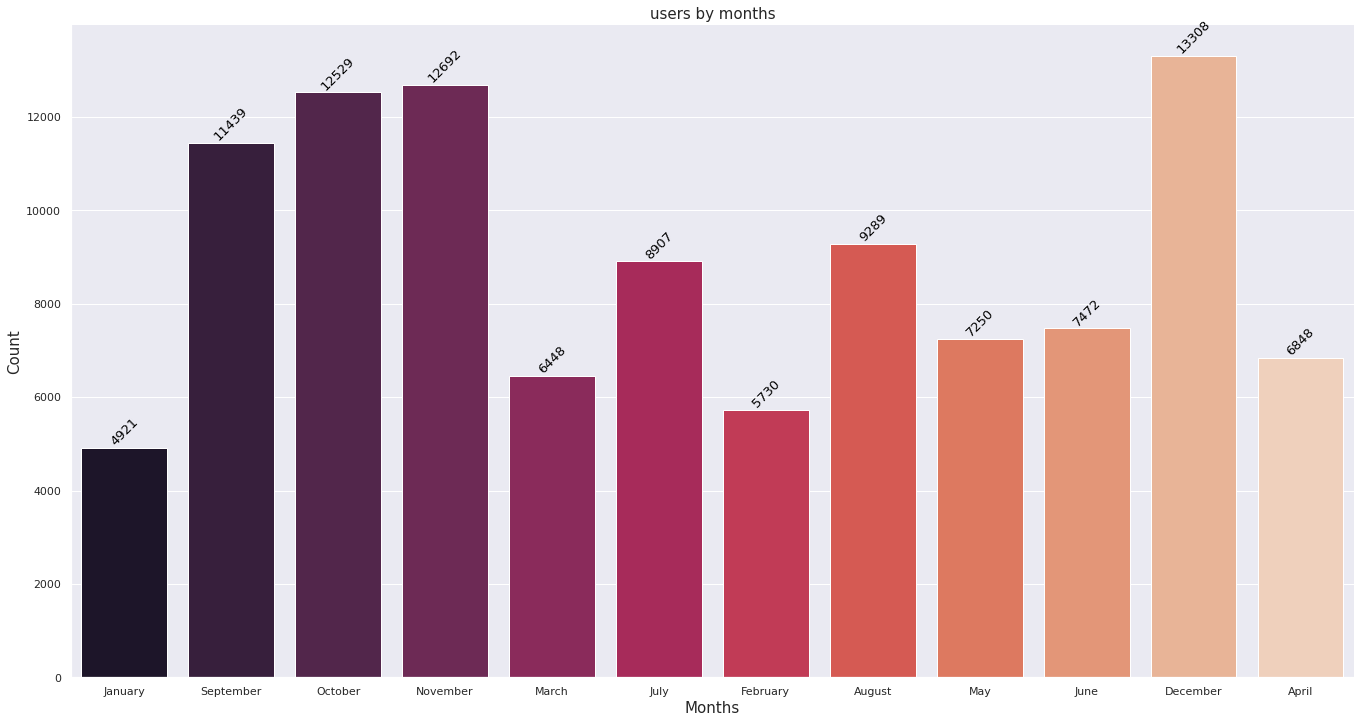

In [63]:
fig, axis = plt.subplots()  
fig.set_size_inches(23, 12) 
sns.countplot(x = 'month_name', data = data,palette="rocket") 
axis.set_xlabel('Months', fontsize=15) 
axis.set_ylabel('Count', fontsize=15)
axis.set_title('users by months', fontsize=15)  
sns.despine()
annotation()

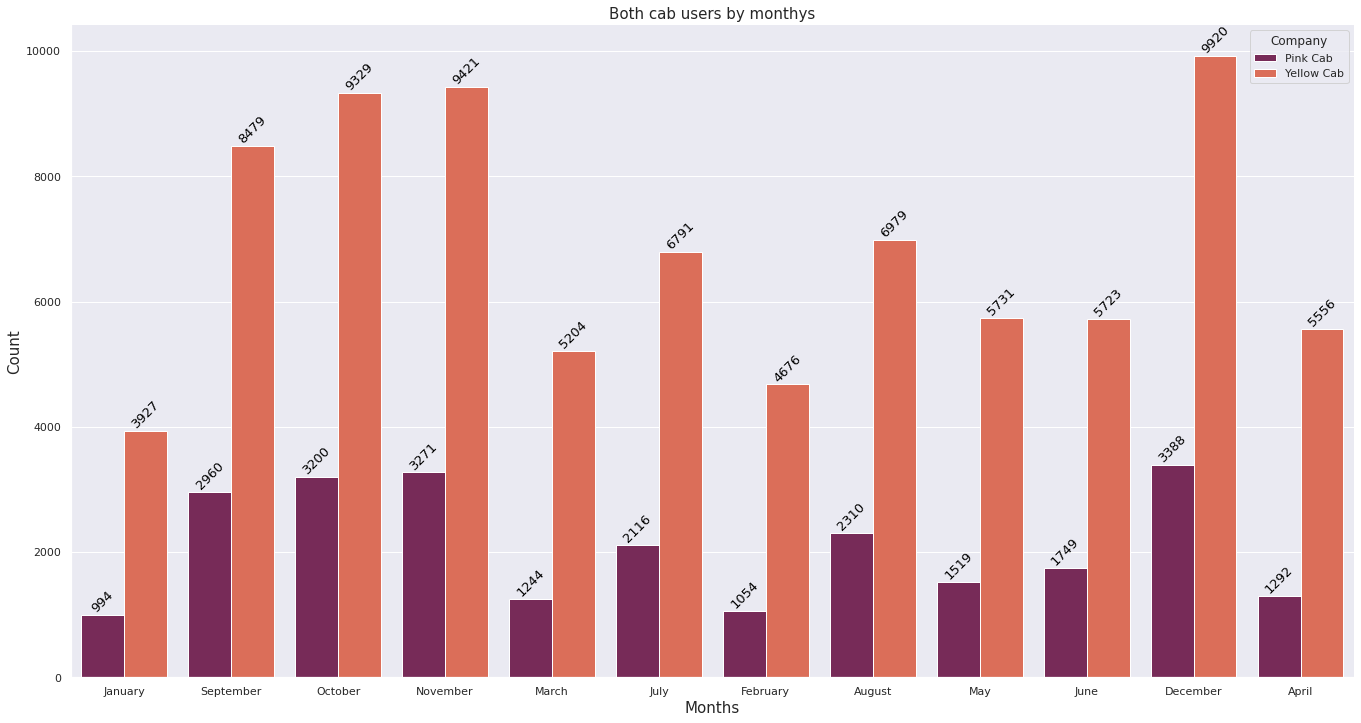

In [64]:
fig, axis = plt.subplots()  
fig.set_size_inches(23, 12) 
sns.countplot(x = 'month_name', data = data,palette="rocket", hue= "Company") 
axis.set_xlabel('Months', fontsize=15) 
axis.set_ylabel('Count', fontsize=15) 
axis.set_title('Both cab users by monthys', fontsize=15) 
sns.despine()
annotation()

### Profit by months

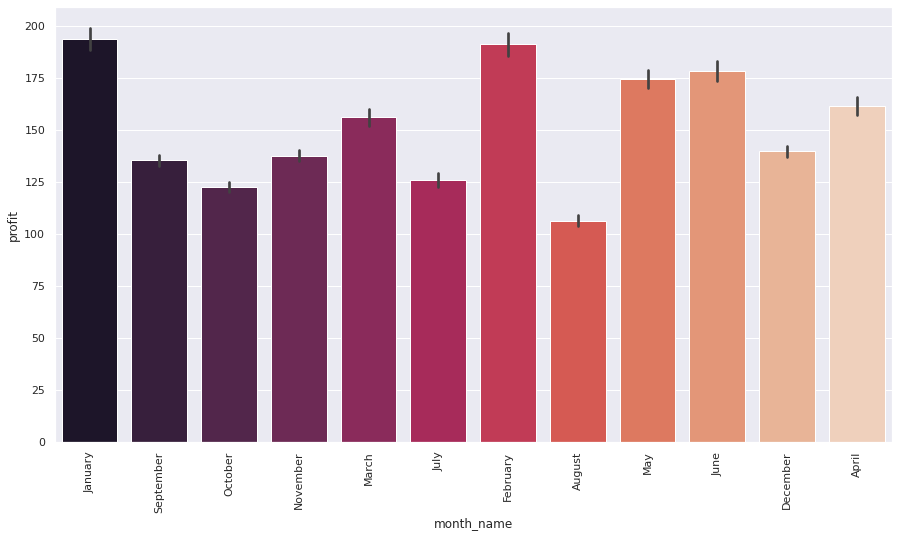

In [61]:
sns.barplot(x=data['month_name'],y= data['profit'],palette="rocket")
plt.xticks(rotation='vertical')
plt.show()

In [67]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,cap_usage %,month,Year,month_name
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,29290,Card,Male,28,10813,814885,24701,3.031225,1,2016,January
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,27703,Card,Male,27,9237,814885,24701,3.031225,1,2016,January
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,28712,Cash,Male,53,11242,814885,24701,3.031225,1,2016,January
3,10079404,2016-09-20,Yellow Cab,ATLANTA GA,39.60,704.30,494.208,210.092,28712,Card,Male,53,11242,814885,24701,3.031225,9,2016,September
4,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,28020,Cash,Male,23,23327,814885,24701,3.031225,1,2016,January


### Payment Modes By each cabs company

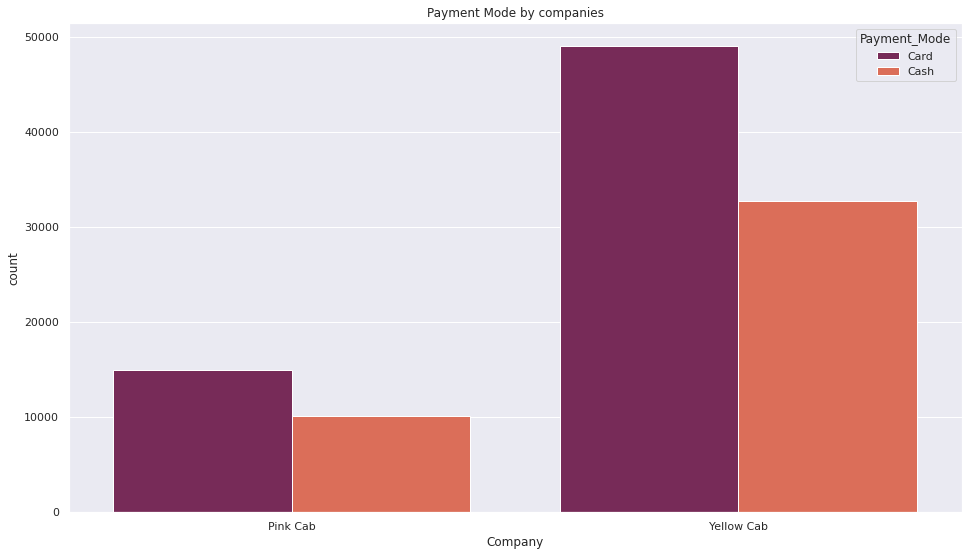

In [68]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=data, palette="rocket")
plt.title('Payment Mode by companies')
plt.show()

### Gender by company

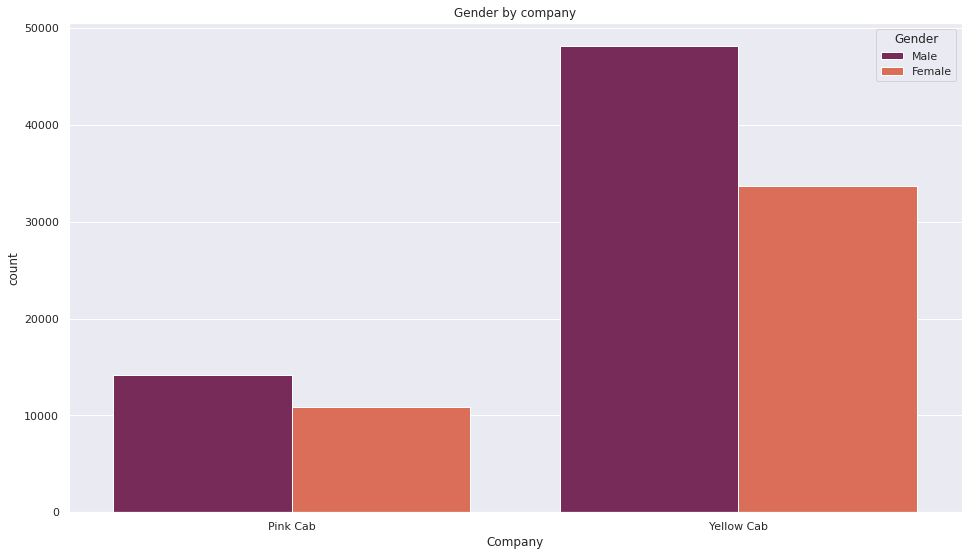

In [69]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Gender", data=data, palette="rocket")
plt.title('Gender by company')
plt.show()

# Gender by months

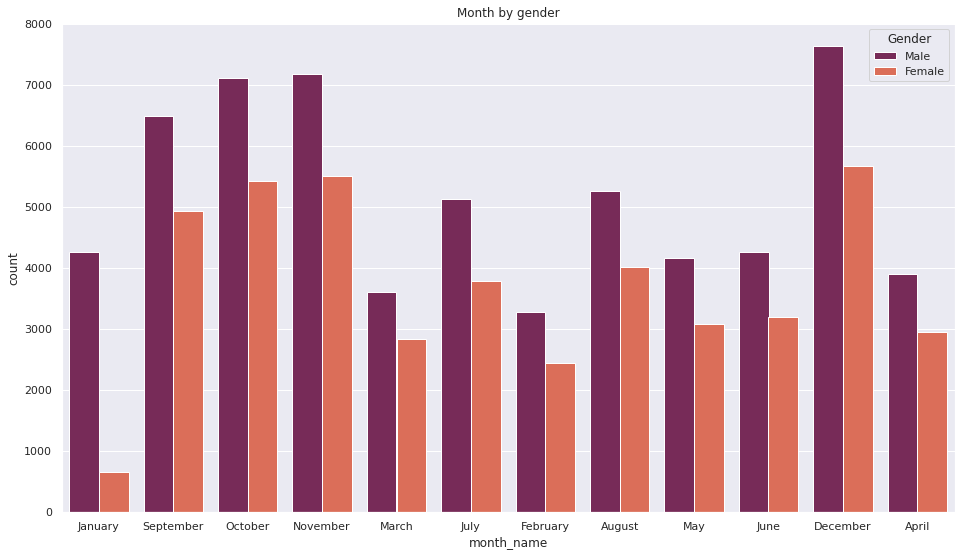

In [70]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="month_name", hue="Gender", data=data, palette="rocket")
plt.title('Month by gender')
plt.show()

### Average income of users by company

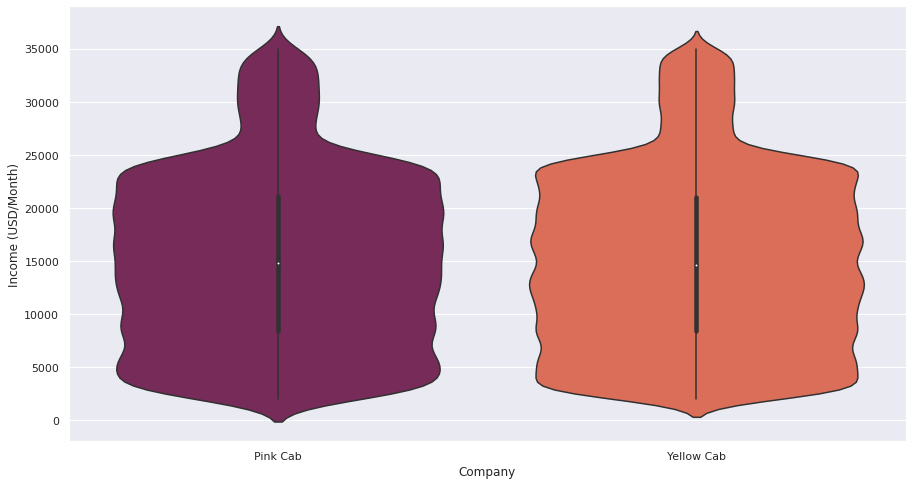

In [72]:
sns.violinplot(x ="Company",
             y = "Income (USD/Month)",
             style ="event",palette="rocket",
             data = data)

### Average Age of users by company

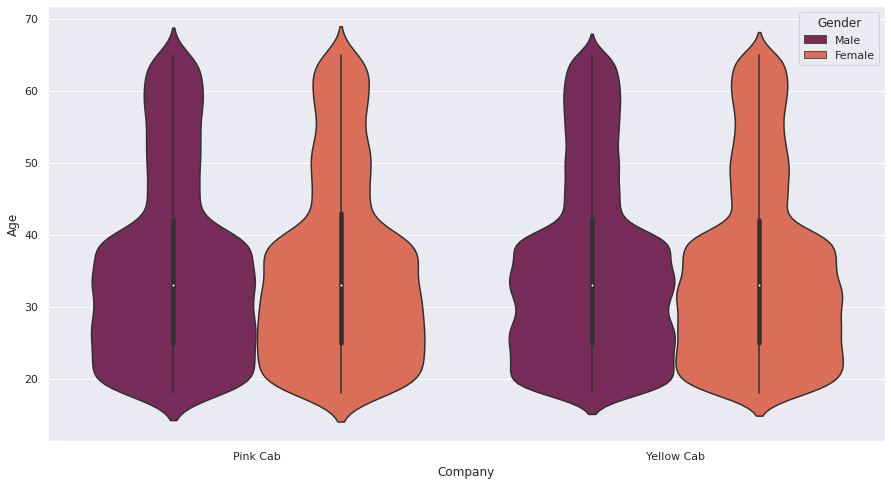

In [71]:
sns.violinplot(x ="Company",
             y = "Age",
             hue= "Gender",
             style ="event",palette="rocket",
             data = data)

# Hypothesis Testing

1) is population of city and usage of cap are co related with each other ?

  if P value is greater than 0.05, it is independent  or else dependent 

In [73]:
import matplotlib.pyplot as plt
FirstSample = data['Population']
SecondSample = data['Users']

In [74]:
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
print()
if p > 0.05:
    print('Population and Usage are independent samples')
else:
    print('Population and Usage are dependent samples : both are co relation with each other')

stat=0.875, p=0.000000

Population and Usage are dependent samples : both are co relation with each other


2) is there price of cab is increase when more KMs are travelled ?

In [75]:

FirstSample = data['KM Travelled']
SecondSample = data['Price Charged']
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
print()
if p > 0.05:
    print('Cost is not increased when people travel more KMs')
else:
    print('Cost is increased when people travel more KMs')

stat=0.890, p=0.000000

Cost is increased when people travel more KMs


3) is High income persons are using car more often?

In [76]:
FirstSample = data['Income (USD/Month)']
SecondSample = data['KM Travelled']
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
print()
if p > 0.05:
    print('Person who earn more money are not  travelling more')
else:
    print('Persons who earn more money are travelling more')

stat=0.003, p=0.312547

Person who earn more money are not  travelling more


4) is there gender making any impact of companies profit?

In [ ]:
# H0 : There is no significant difference ( null hypothesis).
# H1 : There is significant difference (alternative hypothesis)

Pink cab

In [77]:
from scipy import stats
FirstSample = data[(data.Gender=='Male')&(data.Company=='Pink Cab')].groupby('Transaction ID').profit.mean()
secondSample= data[(data.Gender=='Female')&(data.Company=='Pink Cab')].groupby('Transaction ID').profit.mean()

_, p_value = stats.ttest_ind(FirstSample.values,
                             secondSample.values,
                             equal_var=True)

print('P value is :', p_value)
print()

if(p_value > 0.05):
    print('We accept null hypothesis (H0) that there is no significant difference b/w Gender and pink cab profit')
else:
    print('We accept alteranative hypothesis (H1) that there is significant difference b/w Gender and pink cab profit')

P value is : 0.31499934542956914

We accept null hypothesis (H0) that there is no significant difference b/w Gender and pink cab profit


Yellow Cab

In [78]:
from scipy import stats
FirstSample = data[(data.Gender=='Male')&(data.Company=='Yellow Cab')].groupby('Transaction ID').profit.mean()
secondSample= data[(data.Gender=='Female')&(data.Company=='Yellow Cab')].groupby('Transaction ID').profit.mean()

_, p_value = stats.ttest_ind(FirstSample.values,
                             secondSample.values,
                             equal_var=True)

print('P value is :', p_value)
print()

if(p_value > 0.05):
    print('We accept null hypothesis (H0) that there is no significant difference b/w Gender and Yellow Cab profit')
else:
    print('We accept alteranative hypothesis (H1) that there is significant difference b/w Gender and pink cab profit')

P value is : nan

We accept alteranative hypothesis (H1) that there is significant difference b/w Gender and pink cab profit


5) Age categories are making any impact on profit ? 

Pink Cab

In [79]:
from scipy import stats
FirstSample = data[(data.Age <= 50)&(data.Company=='Pink Cab')].groupby('Transaction ID').profit.mean()
secondSample= data[(data.Age >= 50)&(data.Company=='Pink Cab')].groupby('Transaction ID').profit.mean()

_, p_value = stats.ttest_ind(FirstSample.values,
                             secondSample.values,
                             equal_var=True)

print('P value is :', p_value)
print()

if(p_value > 0.05):
    print('We accept null hypothesis (H0) that there is no significant difference b/w age and pink cab profit')
else:
    print('We accept alteranative hypothesis (H1) that there is significant difference b/w age and pink cab profit')

P value is : 0.36886386964296614

We accept null hypothesis (H0) that there is no significant difference b/w age and pink cab profit


Yellow Cab

In [80]:
from scipy import stats
FirstSample = data[(data.Age <= 50)&(data.Company=='Yellow Cab')].groupby('Transaction ID').profit.mean()
secondSample= data[(data.Age >= 50)&(data.Company=='Yellow Cab')].groupby('Transaction ID').profit.mean()

_, p_value = stats.ttest_ind(FirstSample.values,
                             secondSample.values,
                             equal_var=True)

print('P value is :', p_value)
print()

if(p_value > 0.05):
    print('We accept null hypothesis (H0) that there is no significant difference b/w age and pink cab profit')
else:
    print('We accept alteranative hypothesis (H1) that there is significant difference b/w age and pink cab profit')

P value is : nan

We accept alteranative hypothesis (H1) that there is significant difference b/w age and pink cab profit
